In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [3]:
from scipy.stats import mode, norm, skew, kurtosis
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

In [4]:
data = pd.read_csv('titanic.csv')

In [5]:
data.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [6]:
data

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,"Montvila, Rev. Juozas",2,male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,"Graham, Miss. Margaret Edith",1,female,19.0,0,0,112053,30.0000,B42,S,1
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,"Behr, Mr. Karl Howell",1,male,26.0,0,0,111369,30.0000,C148,C,1


In [7]:
data.shape

(891, 12)

In [8]:
for i in data.columns:
    print(i," : ",data[i].unique().shape[0])

PassengerId  :  891
Name  :  891
Pclass  :  3
Sex  :  2
Age  :  89
SibSp  :  7
Parch  :  7
Ticket  :  681
Fare  :  248
Cabin  :  148
Embarked  :  4
Survived  :  2


In [9]:
data.isnull().sum()

PassengerId      0
Name             0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Name         891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
data_one_hot = data.loc[:, data.apply(pd.Series.nunique) <= 10] #method 2 Boolean indexing
data_one_hot

,Pclass,Sex,SibSp,Parch,Embarked,Survived
0,3,male,1,0,S,0
1,1,female,1,0,C,1
2,3,female,0,0,S,1
3,1,female,1,0,S,1
4,3,male,0,0,S,0
...,...,...,...,...,...,...
886,2,male,0,0,S,0
887,1,female,0,0,S,1
888,3,female,1,2,S,0
889,1,male,0,0,C,1


In [12]:
Survived_legend = {0: 'Killed', 1: 'Survived'}

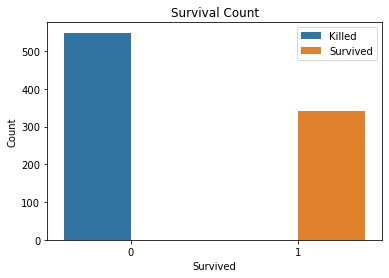

In [13]:
sns.countplot(x='Survived', data=data,hue="Survived")
plt.title('Survival Count')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.legend(Survived_legend.values())
plt.show()

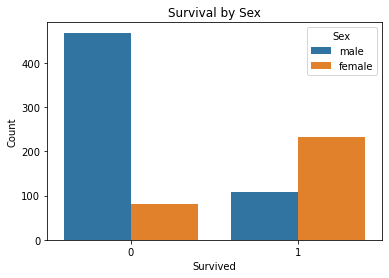

In [14]:
sns.countplot(x='Survived', hue='Sex', data=data)
plt.title('Survival by Sex')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

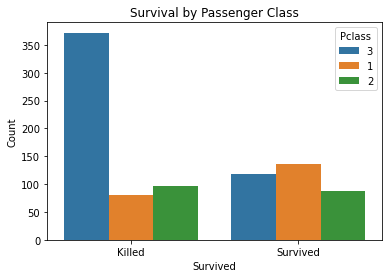

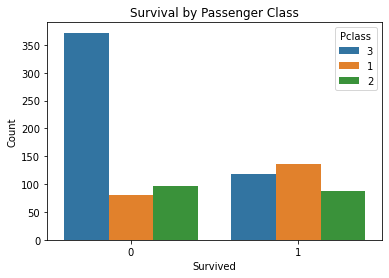

In [15]:
sns.countplot(x='Survived', hue='Pclass', data=data.astype(str)).set_xticklabels(Survived_legend.values())
plt.title('Survival by Passenger Class')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

sns.countplot(x='Survived', hue='Pclass', data=data.astype(str))
plt.title('Survival by Passenger Class')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

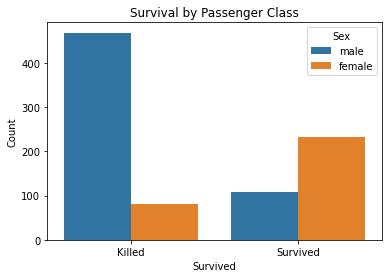

In [16]:
ax=sns.countplot(x='Survived', hue='Sex', data=data.astype(str).sort_values(by='Survived'))
plt.title('Survival by Passenger Class')
plt.xlabel('Survived')
plt.ylabel('Count')
ax.set_xticklabels(Survived_legend.values())
plt.show()

<AxesSubplot:>

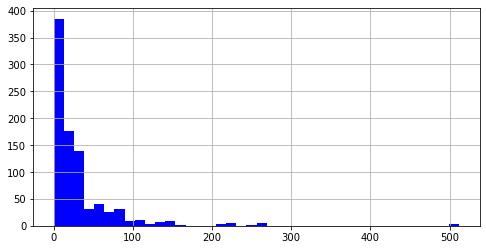

In [17]:
data['Fare'].hist(color='blue',bins=40,figsize=(8,4))

<AxesSubplot:xlabel='SibSp', ylabel='count'>

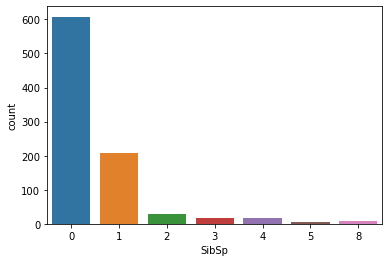

In [18]:
sns.countplot(x='SibSp',data=data)

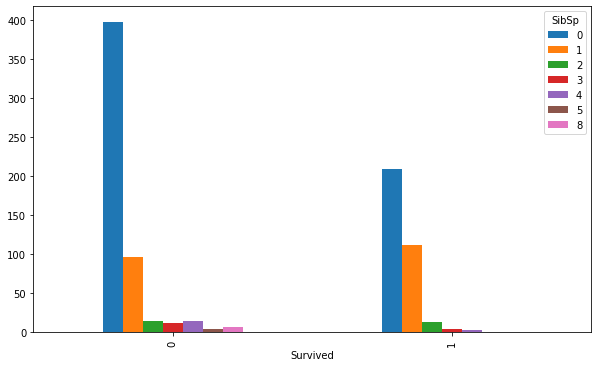

In [19]:
survive_sex=pd.crosstab(data.Survived,data.SibSp)
ax=survive_sex.plot(kind='bar',figsize=(10,6))

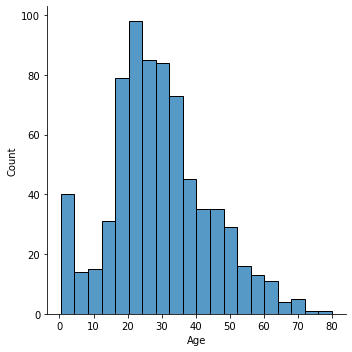

In [20]:
sns.displot(data=data['Age'])

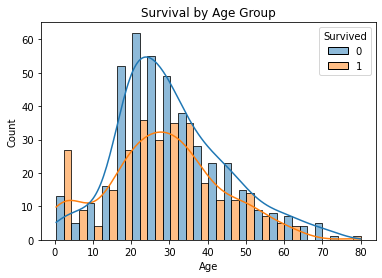

In [21]:
pd.set_option('mode.use_inf_as_na', True)
sns.histplot(x='Age', hue='Survived', data=data, kde=True,multiple='dodge')
plt.title('Survival by Age Group')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

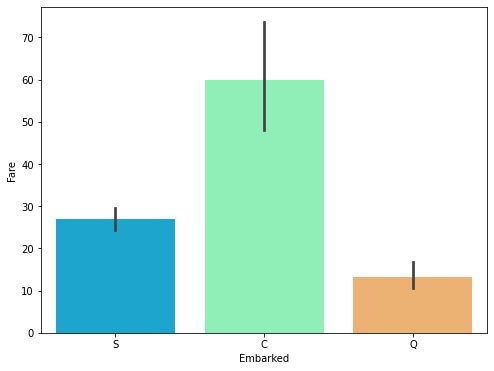

In [22]:
plt.figure(figsize=(8,6))

ax = sns.barplot(data=data, x="Embarked",y="Fare",palette="rainbow")

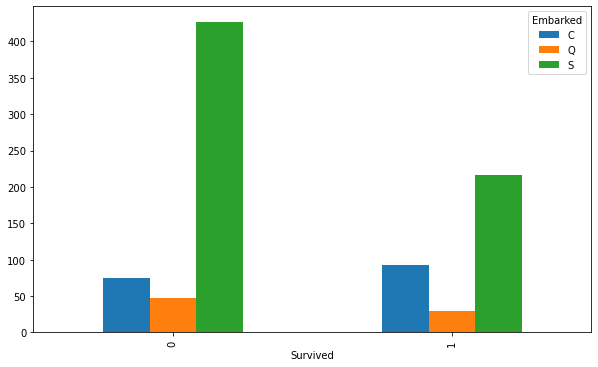

In [23]:
survive_sex=pd.crosstab(data.Survived,data.Embarked)
ax=survive_sex.plot(kind='bar',figsize=(10,6))

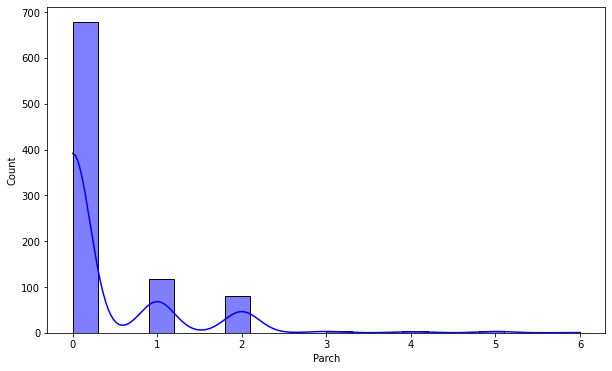

In [24]:
plt.figure(figsize=(10,6))
sns.histplot(data['Parch'], bins=20, kde=True, color='blue') 
plt.show()

<AxesSubplot:xlabel='Survived', ylabel='count'>

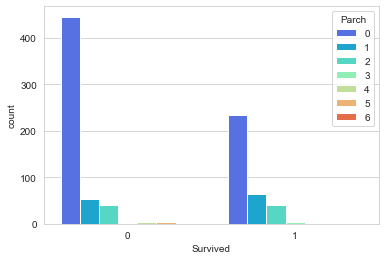

In [25]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Parch',data=data,palette='rainbow')

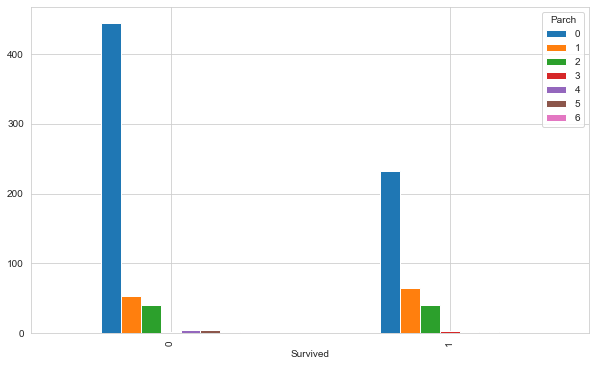

In [26]:
survive_sex=pd.crosstab(data.Survived,data.Parch)
ax=survive_sex.plot(kind='bar',figsize=(10,6))

<AxesSubplot:>

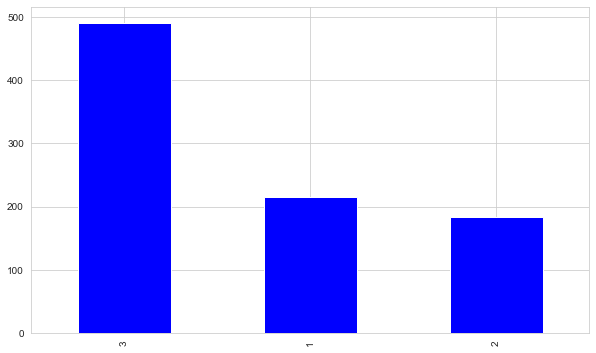

In [27]:
class_degree=data['Pclass'].value_counts()
class_degree.plot(kind='bar',color='blue',figsize=(10,6))

<AxesSubplot:xlabel='Survived', ylabel='count'>

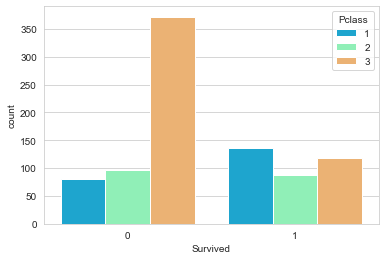

In [28]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=data,palette='rainbow')

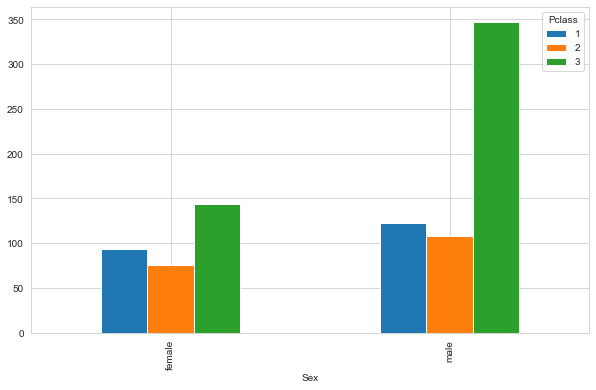

In [29]:
survive_sex=pd.crosstab(data.Sex,data.Pclass)
ax=survive_sex.plot(kind='bar',figsize=(10,6))

<AxesSubplot:>

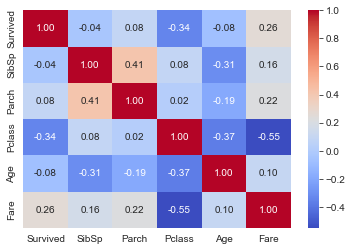

In [30]:
cm = sns.heatmap(data[["Survived","SibSp","Parch","Pclass","Age","Fare"]].corr(),annot=True, fmt = ".2f", cmap = 'coolwarm')
cm